**Import Librarires**

In [ ]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kidneydataset.csv')

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.shape

(400, 26)

**Finding the Unique Values in each column**

In [ ]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in id:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

**Number of null valuesin each column**

In [ ]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Outliers**


'As Fig. 1 shows, there are some outliers detected for blood glucose \nrandom that reached 500 mg/dl. However,\nthe highest blood glucose level recorded in 2008 for a surviving \npatient reached 2,656 mg/dl. So, these outliers are legitimate \nand we should not change them.\n\nThe highest potassium level observed \nwas 7.6 mEq/L. This means that a potassium level with 39 \nand 47, as shown in Fig. 2 is impossible and usually due to a \nmistake.\n\nSimilarly, with sodium, as Fig. 3 shows, one extreme \ndata point was detected, which is 4.5. Normally, sodium level \nshould be between 135 and 145 mEq/L. For this reason, \na value of 4.5 is unacceptable or impossible'

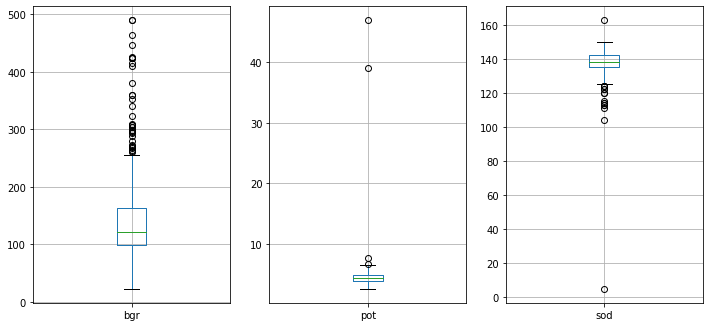

In [ ]:


plt.figure(figsize = (12,12))
plt.subplot(231)
data.boxplot(column = 'bgr')

plt.subplot(232)
data.boxplot(column = 'pot')

plt.subplot(233)
data.boxplot(column = 'sod')

'''As Fig. 1 shows, there are some outliers detected for blood glucose 
random that reached 500 mg/dl. However,
the highest blood glucose level recorded in 2008 for a surviving 
patient reached 2,656 mg/dl. So, these outliers are legitimate 
and we should not change them.

The highest potassium level observed 
was 7.6 mEq/L. This means that a potassium level with 39 
and 47, as shown in Fig. 2 is impossible and usually due to a 
mistake.

Similarly, with sodium, as Fig. 3 shows, one extreme 
data point was detected, which is 4.5. Normally, sodium level 
should be between 135 and 145 mEq/L. For this reason, 
a value of 4.5 is unacceptable or impossible'''

**Replacing the Mistyped Values**

In [ ]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,14]>=7.6:
        data.iloc[i,14]=np.nan
    if data.iloc[i,13]<=98 or data.iloc[i,13]>=255:
        data.iloc[i,13]=np.nan
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '8400'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    
    

In [ ]:
data = data.drop(['id'],axis = 1)

In [ ]:
data['pcv']=data['pcv'].astype('float')
data['wc']=data['wc'].astype('float')
data['rc']=data['rc'].astype('float')

In [ ]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Seperating Numerical and Categorical Fields**

In [ ]:
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
print(numeric)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [ ]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')
print(categoricals)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


**Visualization of Numerical Fields**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

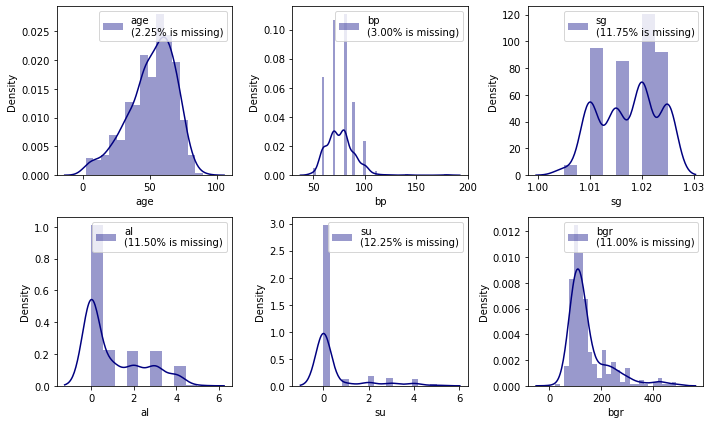

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,6))
plt.subplot(231)
miss="%.2f"%(100*(1-(data['age'].dropna().shape[0])/data.shape[0]))
col='age'+"\n({}% is missing)".format(miss)
fig=sns.distplot(data['age'], color="navy", label=col, norm_hist=True)
fig=fig.legend(loc='best', fontsize=10)

plt.subplot(232)
miss="%.2f"%(100*(1-(data['bp'].dropna().shape[0])/data.shape[0]))
col='bp'+"\n({}% is missing)".format(miss)
fig=sns.distplot(data['bp'], color="navy", label=col, norm_hist=True)
fig=fig.legend(loc='best', fontsize=10)

plt.subplot(233)
miss="%.2f"%(100*(1-(data['sg'].dropna().shape[0])/data.shape[0]))
col='sg'+"\n({}% is missing)".format(miss)
fig=sns.distplot(data['sg'], color="navy", label=col, norm_hist=True)
fig=fig.legend(loc='best', fontsize=10)

plt.subplot(234)
miss="%.2f"%(100*(1-(data['al'].dropna().shape[0])/data.shape[0]))
col='al'+"\n({}% is missing)".format(miss)
fig=sns.distplot(data['al'], color="navy", label=col, norm_hist=True)
fig=fig.legend(loc='best', fontsize=10)

plt.subplot(235)
miss="%.2f"%(100*(1-(data['su'].dropna().shape[0])/data.shape[0]))
col='su'+"\n({}% is missing)".format(miss)
fig=sns.distplot(data['su'], color="navy", label=col, norm_hist=True)
fig=fig.legend(loc='best', fontsize=10)

plt.subplot(236)
miss="%.2f"%(100*(1-(data['bgr'].dropna().shape[0])/data.shape[0]))
col='bgr'+"\n({}% is missing)".format(miss)
fig=sns.distplot(data['bgr'], color="navy", label=col, norm_hist=True)
fig=fig.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

**Visualization of Categorical Fields**

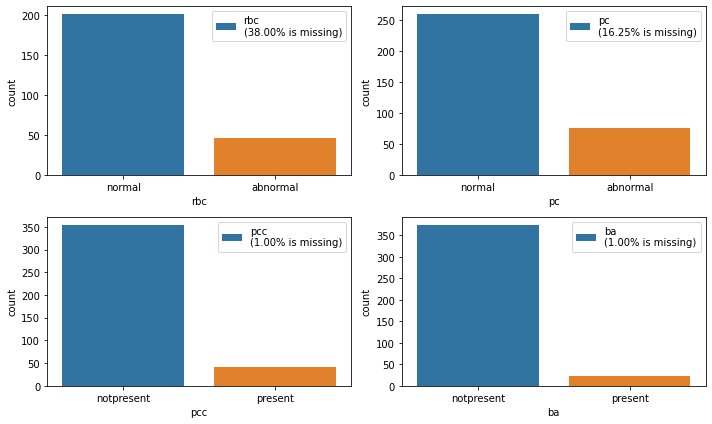

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(221)
miss="%.2f"%(100*(1-(data['rbc'].dropna().shape[0])/data.shape[0]))
col='rbc'+"\n({}% is missing)".format(miss)
fig=sns.countplot(x='rbc',data=data,label=col)
fig=fig.legend(loc='best', fontsize=10)


plt.subplot(222)
miss="%.2f"%(100*(1-(data['pc'].dropna().shape[0])/data.shape[0]))
col='pc'+"\n({}% is missing)".format(miss)
fig=sns.countplot(x='pc',data=data,label=col)
fig=fig.legend(loc='best', fontsize=10)


plt.subplot(223)
miss="%.2f"%(100*(1-(data['pcc'].dropna().shape[0])/data.shape[0]))
col='pcc'+"\n({}% is missing)".format(miss)
fig=sns.countplot(x='pcc',data=data,label=col)
fig=fig.legend(loc='best', fontsize=10)

plt.subplot(224)
miss="%.2f"%(100*(1-(data['ba'].dropna().shape[0])/data.shape[0]))
col='ba'+"\n({}% is missing)".format(miss)
fig=sns.countplot(x='ba',data=data,label=col)
fig=fig.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

**Filling Null Values**


PCV


In [ ]:
data['pcv'].value_counts()

41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
33.0    12
28.0    12
50.0    12
36.0    12
32.0    12
37.0    11
34.0    11
46.0     9
35.0     9
30.0     9
29.0     9
31.0     8
39.0     7
24.0     7
26.0     6
38.0     5
54.0     4
51.0     4
53.0     4
49.0     4
47.0     4
27.0     3
25.0     3
22.0     3
19.0     2
23.0     2
16.0     1
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
Name: pcv, dtype: int64

In [ ]:
data['pcv'].fillna(52,inplace = True)

In [ ]:

data['pcv'].value_counts()

52.0    92
41.0    21
48.0    19
44.0    19
40.0    16
43.0    15
45.0    13
42.0    13
50.0    12
32.0    12
28.0    12
33.0    12
36.0    12
37.0    11
34.0    11
29.0     9
46.0     9
35.0     9
30.0     9
31.0     8
39.0     7
24.0     7
26.0     6
38.0     5
54.0     4
51.0     4
53.0     4
49.0     4
47.0     4
27.0     3
25.0     3
22.0     3
23.0     2
19.0     2
16.0     1
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
Name: pcv, dtype: int64

WC

In [ ]:
data['wc'].value_counts()

9800.0     11
6700.0     10
9200.0      9
9600.0      9
7200.0      9
           ..
18900.0     1
16700.0     1
10900.0     1
5100.0      1
9900.0      1
Name: wc, Length: 89, dtype: int64

In [ ]:
data['wc'].fillna(9800,inplace = True)

In [ ]:
data['wc'].value_counts()

9800.0     117
6700.0      10
9600.0       9
7200.0       9
9200.0       9
          ... 
15700.0      1
26400.0      1
11500.0      1
18900.0      1
9900.0       1
Name: wc, Length: 89, dtype: int64

RC

In [ ]:
data['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
5.0    10
3.9    10
4.8    10
3.4     9
4.6     9
3.7     8
6.1     8
5.9     8
5.5     8
5.8     7
5.4     7
5.3     7
3.8     7
4.2     6
4.0     6
5.6     6
4.3     6
6.5     5
5.7     5
6.4     5
6.2     5
4.4     5
4.1     5
5.1     5
3.2     5
6.0     4
6.3     4
3.6     4
3.0     3
3.5     3
3.3     3
2.9     2
3.1     2
2.1     2
2.7     2
2.8     2
2.5     2
2.6     2
2.4     1
8.0     1
2.3     1
Name: rc, dtype: int64

In [ ]:
data['rc'].fillna(5.2,inplace = True)

In [ ]:
data['rc'].value_counts()

5.2    149
4.5     16
4.9     14
4.7     11
5.0     10
3.9     10
4.8     10
3.4      9
4.6      9
3.7      8
6.1      8
5.9      8
5.5      8
5.8      7
5.4      7
5.3      7
3.8      7
4.2      6
4.0      6
5.6      6
4.3      6
6.5      5
5.7      5
6.4      5
6.2      5
4.4      5
4.1      5
5.1      5
3.2      5
6.0      4
6.3      4
3.6      4
3.0      3
3.5      3
3.3      3
2.9      2
3.1      2
2.1      2
2.7      2
2.8      2
2.5      2
2.6      2
2.4      1
8.0      1
2.3      1
Name: rc, dtype: int64

In [ ]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                88
pot                91
hemo               52
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Catetgorical Features

RBC


In [ ]:
data['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [ ]:
data['rbc'].fillna('normal',inplace = True)
data['rbc'].replace(['normal','abnormal'],[0,1],inplace = True)

In [ ]:
data['rbc'].value_counts()

0    353
1     47
Name: rbc, dtype: int64

PC




In [ ]:
data['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [ ]:
data['pc'].fillna('normal',inplace = True)
data['pc'].replace(['normal','abnormal'],[0,1],inplace = True)

In [ ]:
data['pc'].value_counts()

0    324
1     76
Name: pc, dtype: int64

PCC

In [ ]:
data['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [ ]:
data['pcc'].fillna('notpresent',inplace = True)
data['pcc'].replace(['notpresent','present'],[0,1],inplace = True)

In [ ]:
data['pcc'].value_counts()

0    358
1     42
Name: pcc, dtype: int64

BA


In [ ]:
data['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [ ]:
data['ba'].fillna('notpresent',inplace = True)
data['ba'].replace(['notpresent','present'],[0,1],inplace = True)

In [ ]:
data['ba'].value_counts()

0    378
1     22
Name: ba, dtype: int64

HTN

In [ ]:
data['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [ ]:
data['htn'].fillna('no',inplace = True)
data['htn'].replace(['no','yes'],[0,1],inplace = True)

In [ ]:
data['htn'].value_counts()

0    253
1    147
Name: htn, dtype: int64

DM

In [ ]:
data['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [ ]:
data['dm'].fillna('no',inplace = True)

In [ ]:
data['dm'].value_counts()

no     263
yes    137
Name: dm, dtype: int64

In [ ]:
data['dm'].replace(['no','yes'],[0,1],inplace = True)

CAD



In [ ]:
data['cad'].value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [ ]:
data['cad'].fillna('no',inplace = True)

In [ ]:
data['cad'].replace(['no','yes'],[0,1],inplace = True)

In [ ]:
data['cad'].value_counts()

0    366
1     34
Name: cad, dtype: int64



APPETE



In [ ]:
data['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [ ]:
data['appet'].fillna('good',inplace = True)
data['appet'].replace(['good','poor'],[0,1],inplace = True)

In [ ]:
data['appet'].value_counts()

0    318
1     82
Name: appet, dtype: int64

PE

In [ ]:
data['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [ ]:
data['pe'].fillna('no',inplace = True)
data['pe'].replace(['no','yes'],[0,1],inplace = True)

In [ ]:
data['pe'].value_counts()

0    324
1     76
Name: pe, dtype: int64

ANE

In [ ]:
data['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [ ]:
data['ane'].fillna('no',inplace = True)
data['ane'].replace(['no','yes'],[0,1],inplace = True)

In [ ]:
data['ane'].value_counts()

0    340
1     60
Name: ane, dtype: int64

CLASSIFICATION

In [ ]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

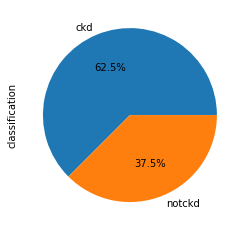

In [ ]:
graph1=data['classification'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [ ]:
data['classification'].replace(['ckd','notckd'],[1,0],inplace = True)


In [ ]:
data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [ ]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [ ]:
data.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               88
pot               91
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [ ]:
mean = data["age"].mean()
data["age"].fillna(mean, inplace=True)

mean = data["bp"].mean()
data["bp"].fillna(mean, inplace=True)

mean = data["sg"].mean()
data["sg"].fillna(mean, inplace=True)

mean = data["al"].mean()
data["al"].fillna(mean, inplace=True)

mean = data["su"].mean()
data["su"].fillna(mean, inplace=True)

mean = data["bgr"].mean()
data["bgr"].fillna(mean, inplace=True)

mean = data["bu"].mean()
data["bu"].fillna(mean, inplace=True)

mean = data["sc"].mean()
data["sc"].fillna(mean, inplace=True)


mean = data["sod"].mean()
data["sod"].fillna(mean, inplace=True)

mean = data["pot"].mean()
data["pot"].fillna(mean, inplace=True)

mean = data["hemo"].mean()
data["hemo"].fillna(mean, inplace=True)



In [ ]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

**Loading the new dataset after Data Augmentation**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/new.csv')

**Visualization of New Dataset**

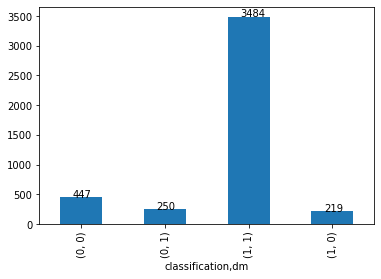

In [ ]:
ax=data['dm'].groupby(data['classification']).value_counts().plot(kind="bar")

for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))

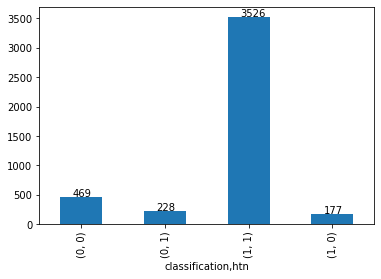

In [ ]:
ax=data['htn'].groupby(data['classification']).value_counts().plot(kind="bar")
for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))

In [ ]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

**Seperating Numerical and Categorical Fields**

In [ ]:
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
print(numeric)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [ ]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('classification')
print(categoricals)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [ ]:
print(data.head())

    age    bp     sg   al   su  rbc  ...  dm  cad  appet  pe  ane  classification
0  48.0  80.0  1.020  1.0  0.0    0  ...   1    0      0   0    0               1
1   7.0  50.0  1.020  4.0  0.0    0  ...   0    0      0   0    0               1
2  62.0  80.0  1.010  2.0  3.0    0  ...   1    0      1   0    1               1
3  48.0  70.0  1.005  4.0  0.0    0  ...   0    0      1   1    1               1
4  51.0  80.0  1.010  2.0  0.0    0  ...   0    0      0   0    0               1

[5 rows x 25 columns]


In [ ]:
X = data.iloc[:,0:24]
y = data.iloc[:,24]

In [ ]:
from sklearn import model_selection,svm
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.3)

**Guassian Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import accuracy_score,confusion_matrix 
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  
predict_test = classifier.predict(X_test)  
cm = confusion_matrix(y_test,predict_test) 
print(cm)
accuracy_test = accuracy_score(y_test,predict_test)
print(accuracy_test)

[[ 204   12]
 [  53 1051]]
0.9507575757575758


**Support Vector Machine Classier**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix 
model = svm.SVC()
model.fit(X_train,y_train)
predict_test= model.predict(X_test)
print(confusion_matrix(y_test,predict_test))
accuracy_test = accuracy_score(y_test,predict_test)
print(accuracy_test)
mse = np.sum((predict_test-y_test)**2)/len(predict_test)
# print('mse',mse)
# print('rmse',mse**0.5)

[[   0  216]
 [   0 1104]]
0.8363636363636363


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix 
model = svm.SVC(kernel = 'sigmoid')
model.fit(X_train,y_train)
predict_test= model.predict(X_test)
print(confusion_matrix(y_test,predict_test))
accuracy_test = accuracy_score(y_test,predict_test)
print(accuracy_test)

[[  9 207]
 [162 942]]
0.7204545454545455


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix 
model = svm.SVC(kernel = 'rbf',gamma=0.001)
model.fit(X_train,y_train)
predict_test= model.predict(X_test)
print(confusion_matrix(y_test,predict_test))
accuracy_test = accuracy_score(y_test,predict_test)
print(accuracy_test)

[[  37  179]
 [  14 1090]]
0.8537878787878788


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.3)
model = RandomForestClassifier(n_estimators=8,n_jobs=-1,random_state=0,max_depth=4)
model.fit(X_train,y_train)
predict_test=model.predict(X_test)
accuracy_test_rf= accuracy_score(y_test,predict_test)
print(confusion_matrix(y_test,predict_test))
print('accuracy_test',accuracy_test_rf)
mse = np.sum((predict_test-y_test)**2)/len(predict_test)
print('mse',mse)
print('rmse',mse**0.5)

[[ 164   47]
 [  22 1087]]
accuracy_test 0.9477272727272728
mse 0.05227272727272727
rmse 0.22863229709016894


In [ ]:
print(data.shape)

(4400, 25)


**Feature Extraction and Selection**

### Correlation

In [ ]:
data.corr()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.158085,0.004797,0.102832,0.176142,0.069884,0.087588,0.100344,0.067611,0.203419,0.152508,0.119382,-0.052811,0.122182,-0.124506,-0.129234,0.119424,-0.143131,0.115600,0.118576,0.093760,0.098564,0.084614,0.063138,0.070975
bp,0.158085,1.000000,0.036646,0.128491,0.167027,0.103174,0.114711,0.067625,0.071831,0.148313,0.157037,0.158986,-0.063994,0.118483,-0.200226,-0.179387,0.052043,-0.134177,0.113511,0.116241,0.078732,0.123274,0.049905,0.092495,0.075037
sg,0.004797,0.036646,1.000000,0.112583,0.095999,0.042743,0.050238,0.063947,0.047448,0.007359,0.023701,0.033651,0.026899,0.065244,0.022732,0.026293,-0.006245,0.037920,0.024138,0.021964,0.045460,0.033576,0.049003,0.048927,0.011941
al,0.102832,0.128491,0.112583,1.000000,0.423239,0.198438,0.301518,0.262576,0.218719,0.285244,0.292404,0.260511,-0.204473,0.105635,-0.258561,-0.202678,0.173362,-0.179148,0.339144,0.313300,0.232700,0.281131,0.302259,0.265496,0.443216
su,0.176142,0.167027,0.095999,0.423239,1.000000,0.146992,0.226898,0.210117,0.190090,0.485856,0.117461,0.204438,-0.037910,0.111521,-0.086540,-0.063817,0.156594,-0.033996,0.296970,0.311629,0.228584,0.216529,0.228257,0.216826,0.342726
rbc,0.069884,0.103174,0.042743,0.198438,0.146992,1.000000,0.263091,0.219983,0.188148,0.121334,0.144182,0.144508,0.001582,0.122579,-0.027233,-0.012289,0.049244,0.052415,0.321969,0.322566,0.218254,0.277836,0.287856,0.234951,0.277947
pc,0.087588,0.114711,0.050238,0.301518,0.226898,0.263091,1.000000,0.299699,0.226254,0.166007,0.189033,0.181825,0.001950,0.130894,-0.037720,-0.010535,0.120549,0.028442,0.427243,0.386640,0.300318,0.337524,0.341527,0.322298,0.413521
pcc,0.100344,0.067625,0.063947,0.262576,0.210117,0.219983,0.299699,1.000000,0.221819,0.168497,0.141704,0.152956,0.002698,0.122032,-0.019900,-0.005230,0.135222,0.015919,0.378832,0.364680,0.257490,0.287574,0.305323,0.283934,0.400856
ba,0.067611,0.071831,0.047448,0.218719,0.190090,0.188148,0.226254,0.221819,1.000000,0.119663,0.117664,0.138851,0.036030,0.116715,0.028145,0.035360,0.074228,0.071938,0.305976,0.292246,0.203004,0.253046,0.234093,0.237781,0.325058
bgr,0.203419,0.148313,0.007359,0.285244,0.485856,0.121334,0.166007,0.168497,0.119663,1.000000,0.175562,0.136432,-0.160178,0.035198,-0.189211,-0.134620,0.153479,-0.130168,0.219951,0.236278,0.159031,0.154634,0.150013,0.155466,0.285990


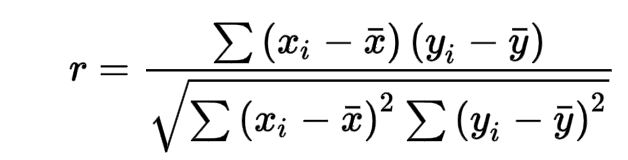

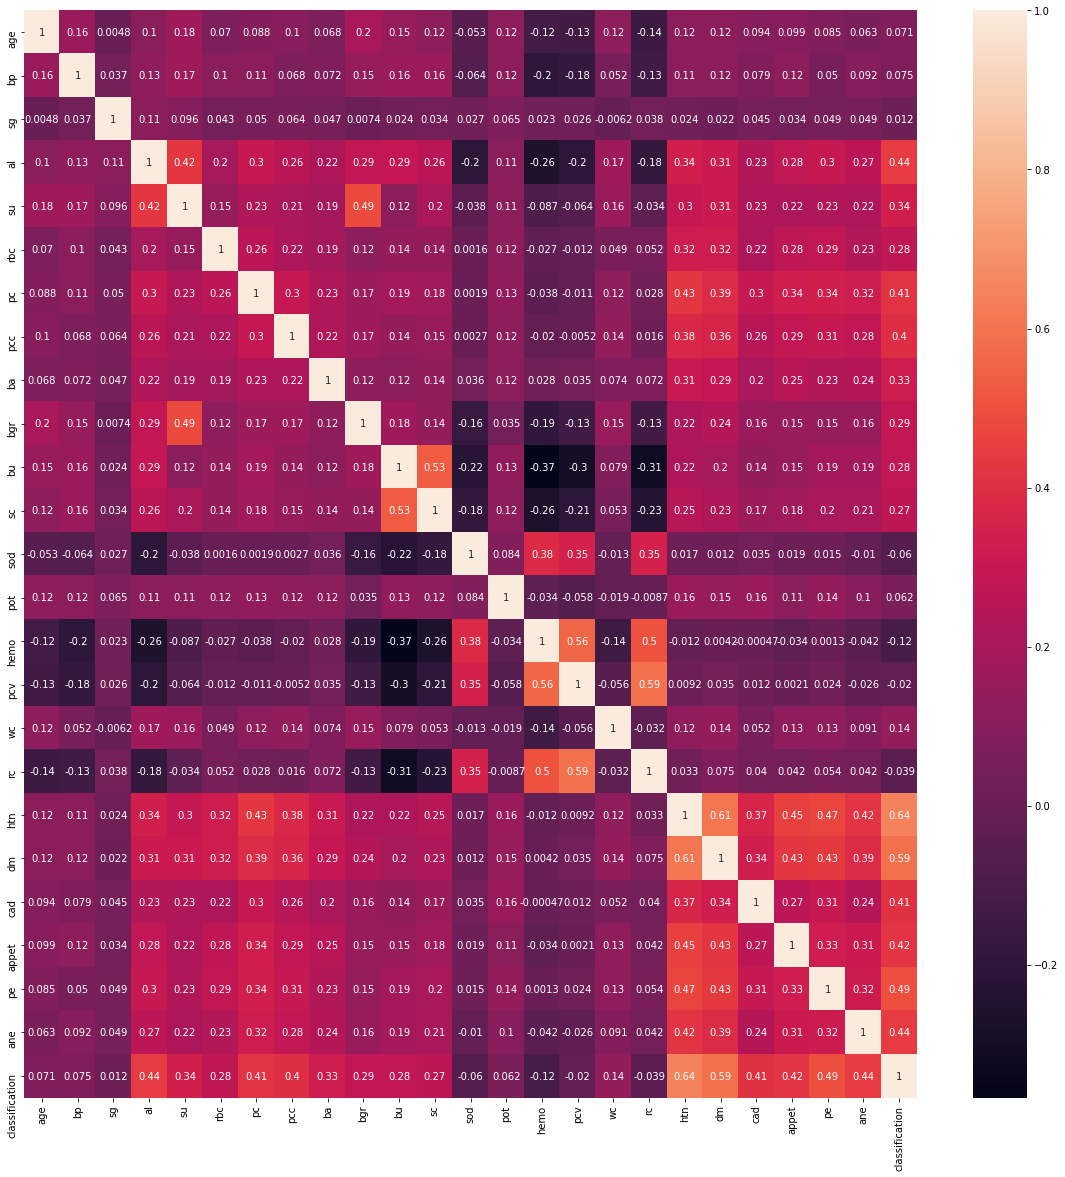

In [ ]:

import seaborn as sns
corr=data.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(),annot=True)

In [ ]:
threshold=0.55

In [ ]:

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(data,threshold)

{'classification', 'dm', 'pcv', 'rc'}

**Wrapper Methods**

### Forward Feature Selection

In [ ]:
X = data.iloc[:,0:24]
y = data.iloc[:,24]

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector #machine learning extensions
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = svm.SVC()
ffs1 =  SequentialFeatureSelector(model,k_features=(1,24),
                                 forward=True,verbose=2,
                                 floating=False,
                                 scoring='accuracy',
                                 cv=5,
                                 n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.0s finished

[2021-06-30 14:04:49] Features: 1/24 -- score: 0.9194805194805195[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    9.1s finished

[2021-06-30 14:04:59] Features: 2/24 -- score: 0.9357142857142857[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    7.0s finished

[2021-06-30 14:05:06] Features: 3/24 -- score: 0.939935064935065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    6.8s finished

[2021-06-30 14:05:12] Features: 4/24 -- score: 0.9415584415584416[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.5s finished

[

In [ ]:
ffs1.k_feature_names_

('sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'sc',
 'pot',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane')

In [ ]:
ffs1.k_score_

0.950974025974026

In [ ]:
ffs1.k_feature_idx_

(2, 3, 4, 5, 6, 7, 8, 11, 13, 17, 18, 19, 20, 21, 22, 23)

**Support Vector Machine Classifier**

In [ ]:
print(data.shape)

(4400, 25)


In [ ]:
X=data.iloc[:,[2, 3, 4, 5, 6, 7, 8,11,13,15,17, 18, 19, 20, 21, 22, 23]]
y=data.iloc[:,24]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.3)

In [ ]:
model = svm.SVC()
model.fit(X_train,y_train)
predict_test= model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test,predict_test)
print(confusion_matrix(y_test,predict_test))
print('accuracy_test',accuracy_test_svm)
#Here true positive refer to (0,0) and true negative refer to (1,1) so 
#accuracy = (tp+tn)/(tp+tn+fp+fn)

mse = np.sum((predict_test-y_test)**2)/len(predict_test)
print('mse',mse)

rmse = mse**0.5
print(rmse)


[[ 140   75]
 [  10 1095]]
accuracy_test 0.9356060606060606
mse 0.06439393939393939
0.2537596094612761
